In [4]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import sys
from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../")

%matplotlib inline
plt.style.use('ggplot')

In [5]:
env = gym.make('Blackjack-v0')

In [6]:
def mc_predictions(policy, env, num_episodes, discount_factor=1.0):
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes+1):
        if i_episode % 1000 == 0:
            print('\rEpisode {}/{}.'.format(i_episode, num_episodes), end="")
            sys.stdout.flush()
            
        episode = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
            
        states_in_episodes = set([tuple(x[0]) for x in episode])
        for state in states_in_episodes:
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == state)
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state]/returns_count[state]
            
    return V

In [7]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [14]:
import plotting

Episode 10000/10000.

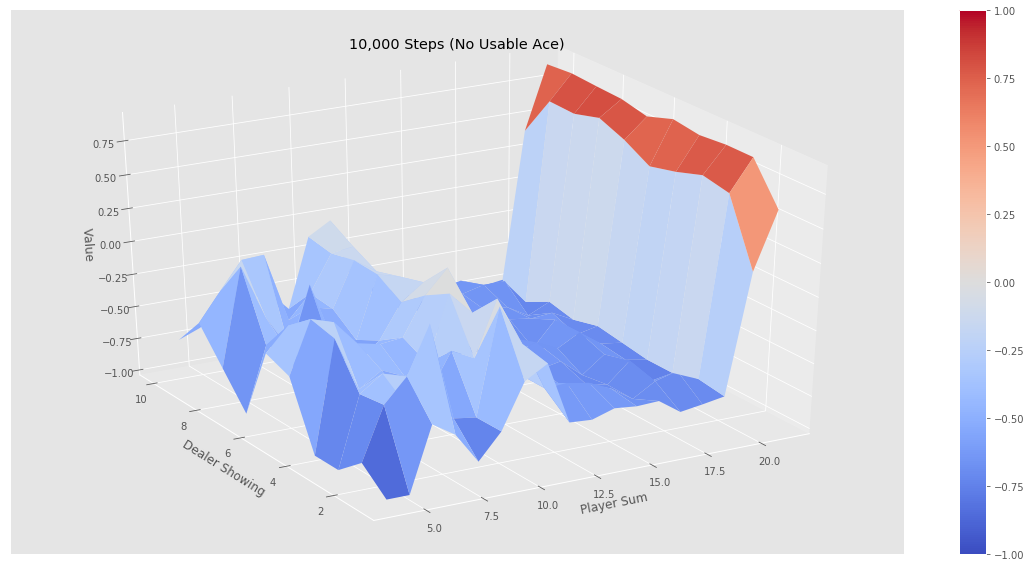

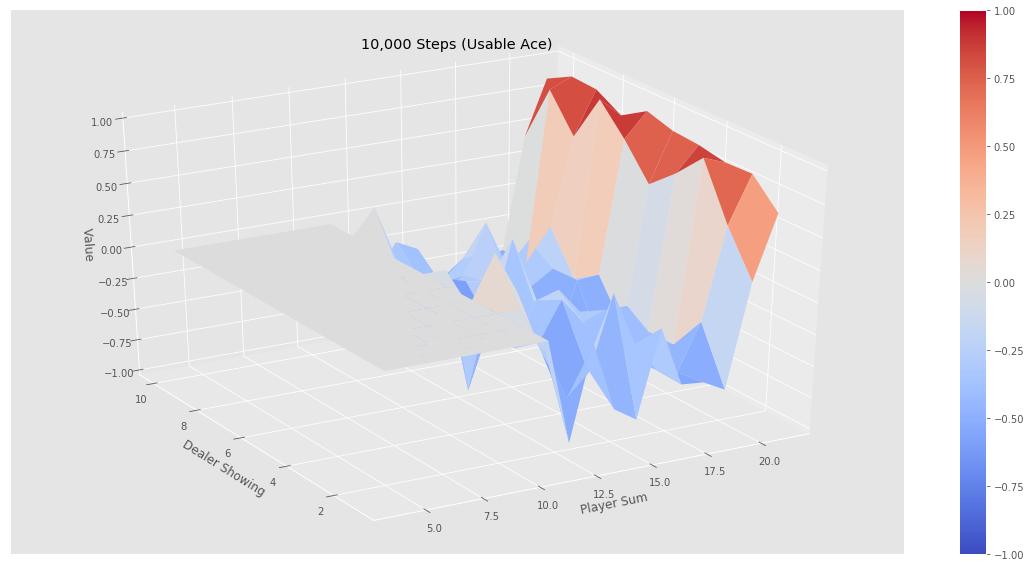

In [15]:
V_10k = mc_predictions(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

Episode 500000/500000.

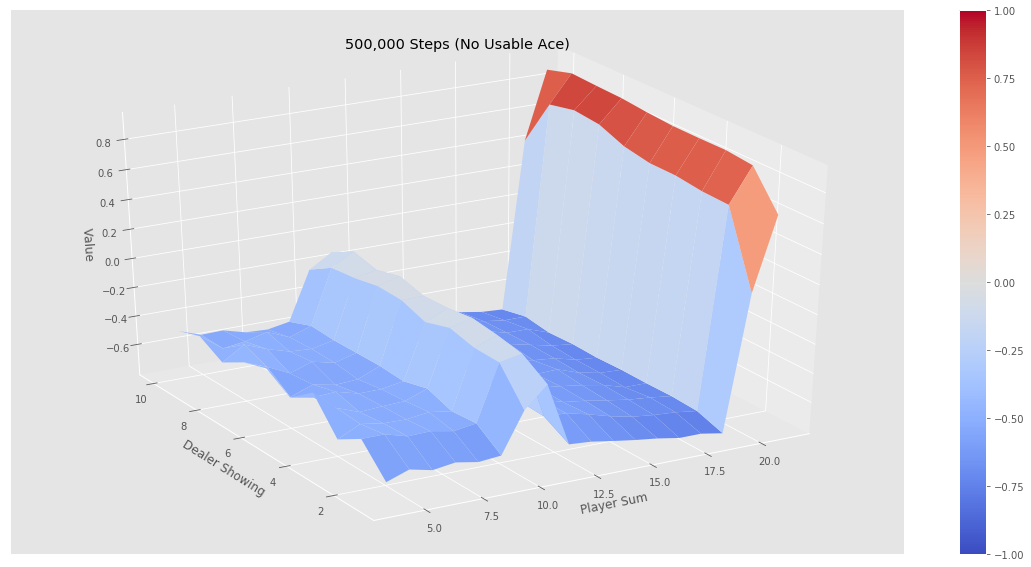

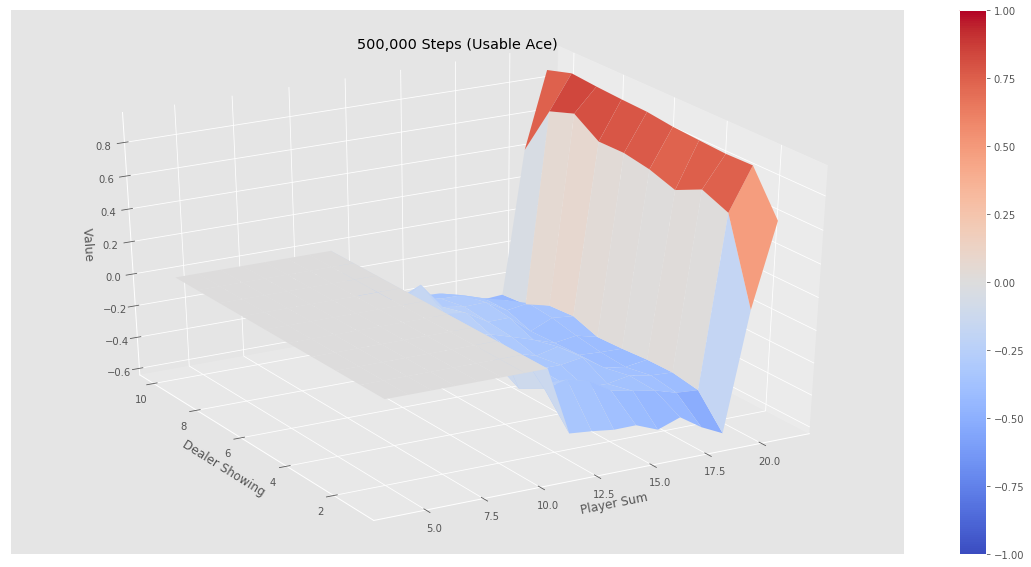

In [16]:
V_500k = mc_predictions(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")